<h2> Final Observation based on analysis below (TL;DR)</h2>

<ul>
<li> those are flights that have a strong demand closer to the takeoff date. possible short distance flights </li>
<li> there are market ineficiencies around the supply and demand of different fares</li>
<li> more expensive fares are being spoiled (supply > demand)</li>
<li> cheaper flights are being overbooked (shortage) (demand > supply)
<li> an efficient sales strategy should see all the availalbe tickets  reach 0 when NDO=0 (when the airline takes off) that would entail an equilibrium reached (Supply=Ddemand) </li>
<li> cheaper flights are falling below 0  (demand > supply) on take off date </li>
<li> if we consider airline tickets are parishable goods (unsold ticket becomes worthless when the airline takes off) we are encoutering spoilages with expensive fares </li>
<li> the dataset also contains SEASONALITIES around december and january </li>
<li> the cheaper the fare class, the sooner people start to buy (cheap purchase begins around week 17-20 before take off, expensive ones around week 7-10)
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

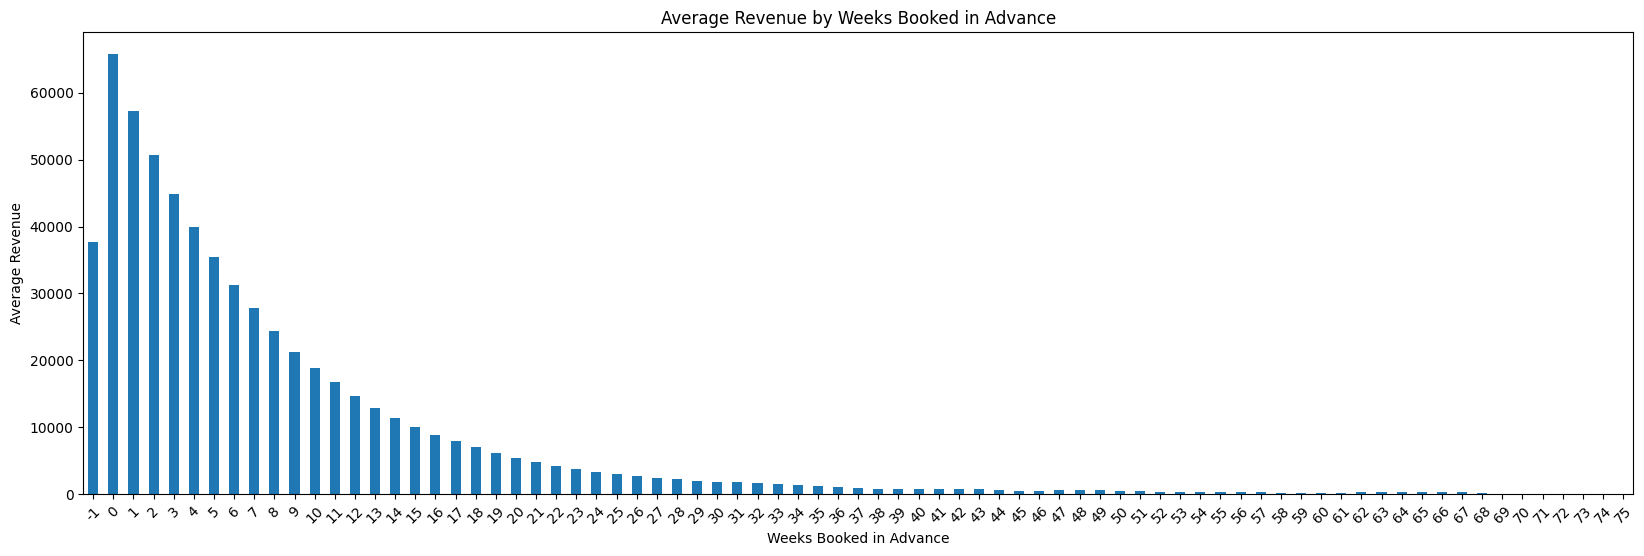

In [17]:
transat_data = pd.read_csv("transat.csv")
average_revenue = transat_data.groupby('NDOWeek')['Revenue_Economy'].mean()
plt.figure(figsize=(20, 6)) 
average_revenue.plot(kind='bar')
plt.xlabel('Weeks Booked in Advance')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Weeks Booked in Advance')
plt.xticks(rotation=45)
plt.show()
# -1 week illogical data (2 obs)

<h3>Interpretation graph above</h3>

<ul>
<li>Revenue generated tends to pick up closer to the takeoff date</li>
<li> This might be a short distance flight, as international flights require longer preparations</li>
</ul>

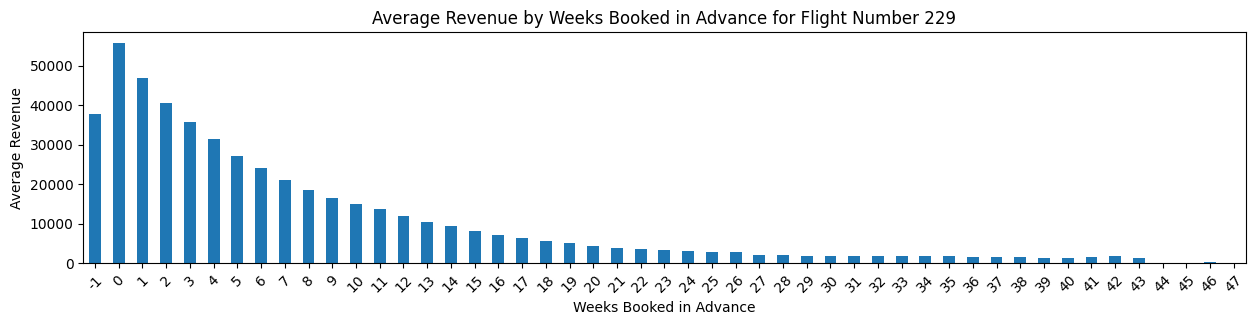

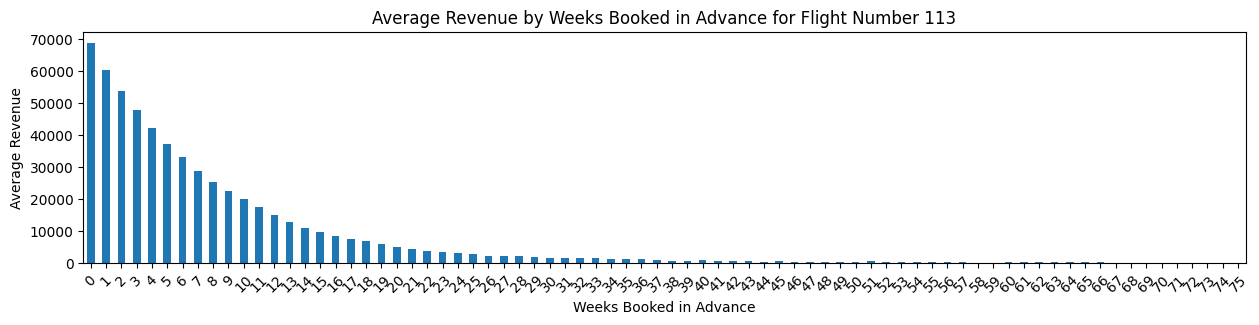

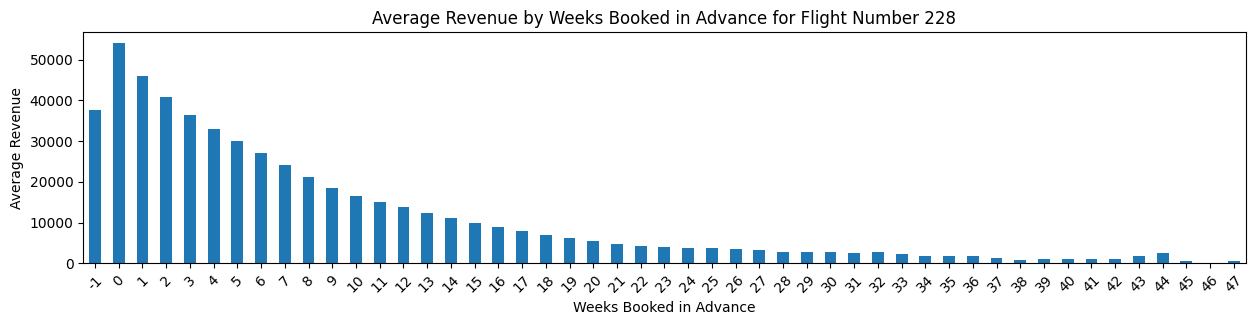

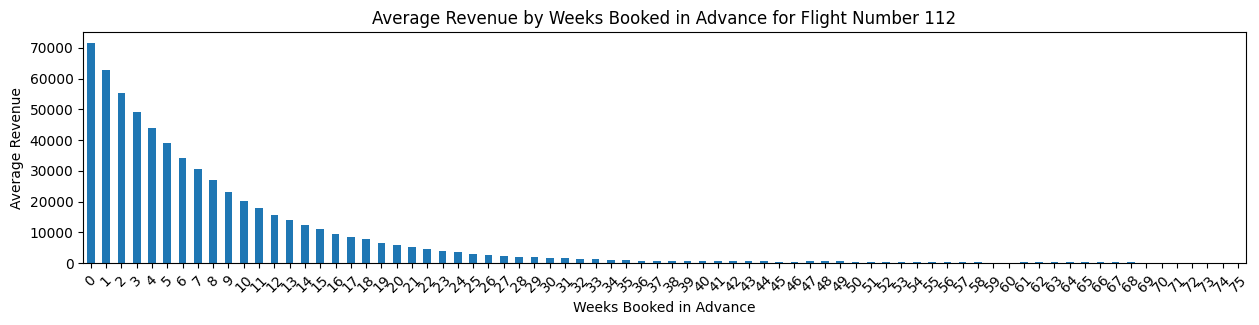

In [4]:
transat_data = pd.read_csv("transat.csv")
flight_numbers = transat_data['FlightNumber'].unique()
for flight_number in flight_numbers:
    flight_data = transat_data[transat_data['FlightNumber'] == flight_number]
    average_revenue = flight_data.groupby('NDOWeek')['Revenue_Economy'].mean()
    plt.figure(figsize=(15, 3))
    average_revenue.plot(kind='bar')
    plt.xlabel('Weeks Booked in Advance')
    plt.ylabel('Average Revenue')
    plt.title(f'Average Revenue by Weeks Booked in Advance for Flight Number {flight_number}')
    plt.xticks(rotation=45)
    plt.show()

<h3> Interpretation graph above</h3>

<ul>
<li>Same pattern as previous graph for different flights </li>
<li> flights 113 and 112 have a higher peak (max value)  </li>
</ul>

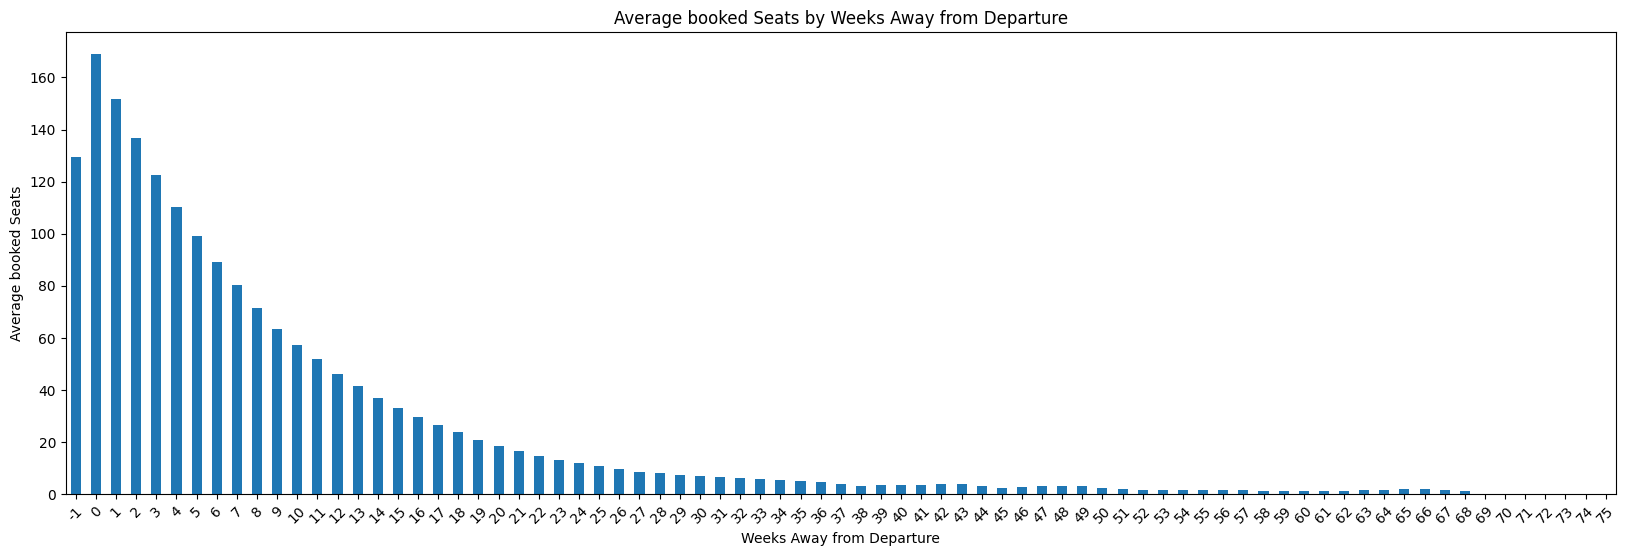

In [3]:
transat_data = pd.read_csv("transat.csv")
filtered_data = transat_data
avg_avail = filtered_data.groupby('NDOWeek')['Booked_Economy'].mean()

plt.figure(figsize=(20, 6))
avg_avail.plot(kind='bar')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average booked Seats')
plt.title('Average booked Seats by Weeks Away from Departure')
plt.xticks(rotation=45)
plt.show()

<h3> Interpretation graph above</h3>

<ul>
<li>Demand also picks up closer to the takeoff date increased demand, not just a maximization of fare price </li>
<li> increased demand, not just a maximization of fare price  </li>
<li> Can be a combination of both increased demand and increased fare price  (TBD later with deeper analysis)</li>
</ul>

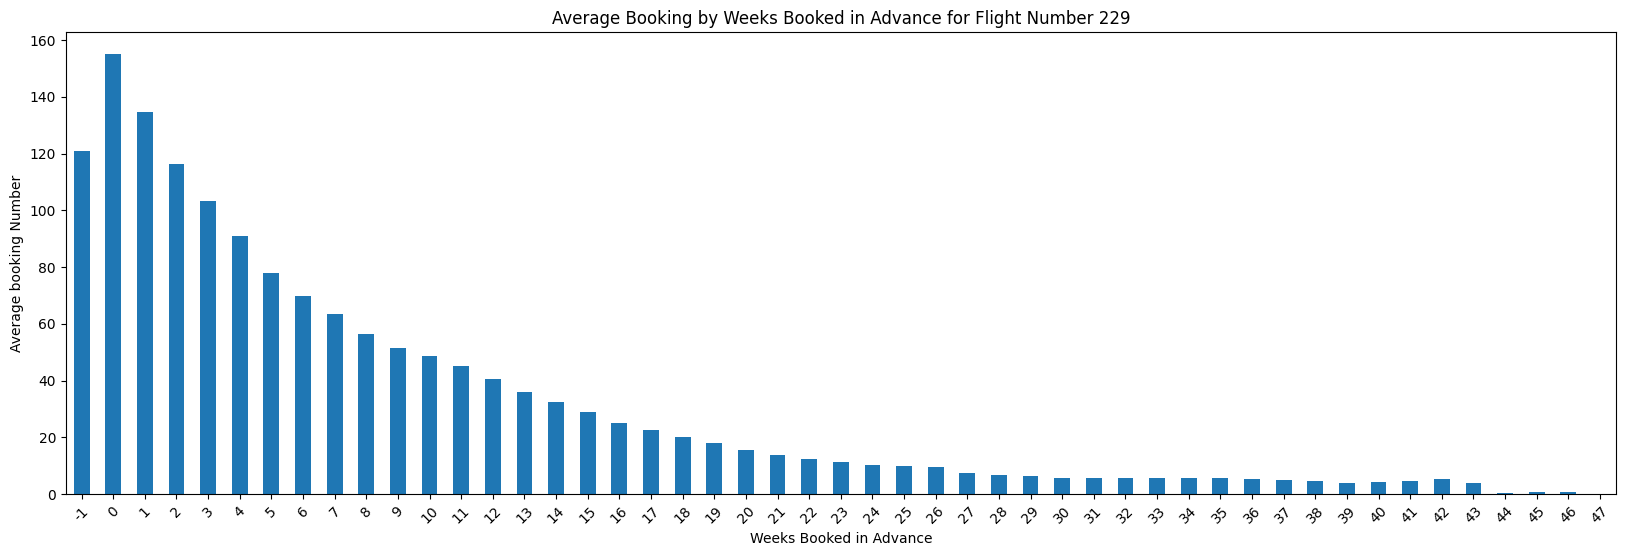

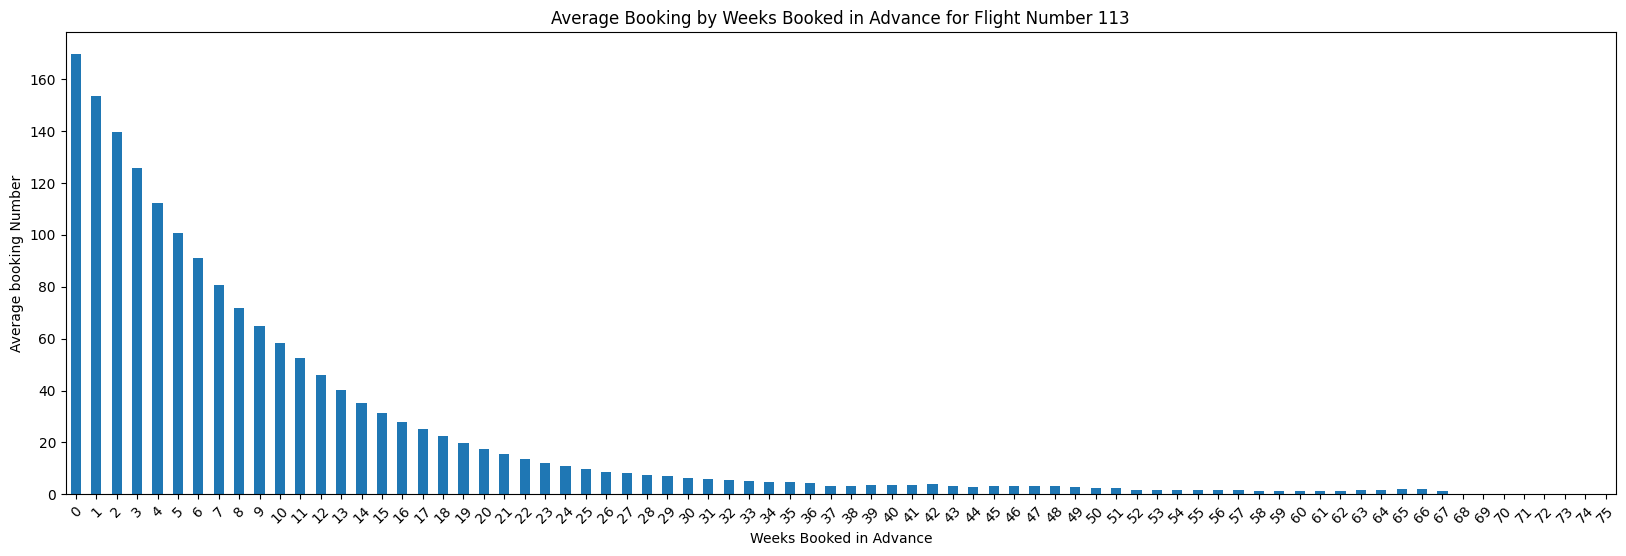

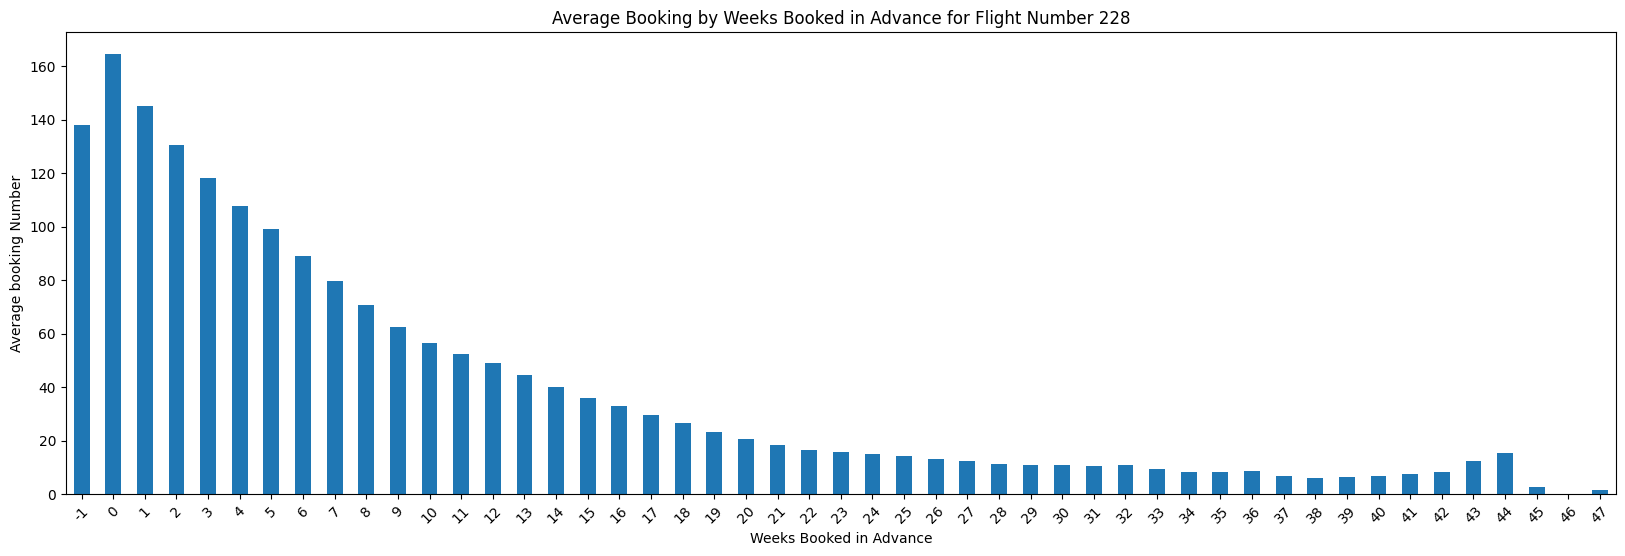

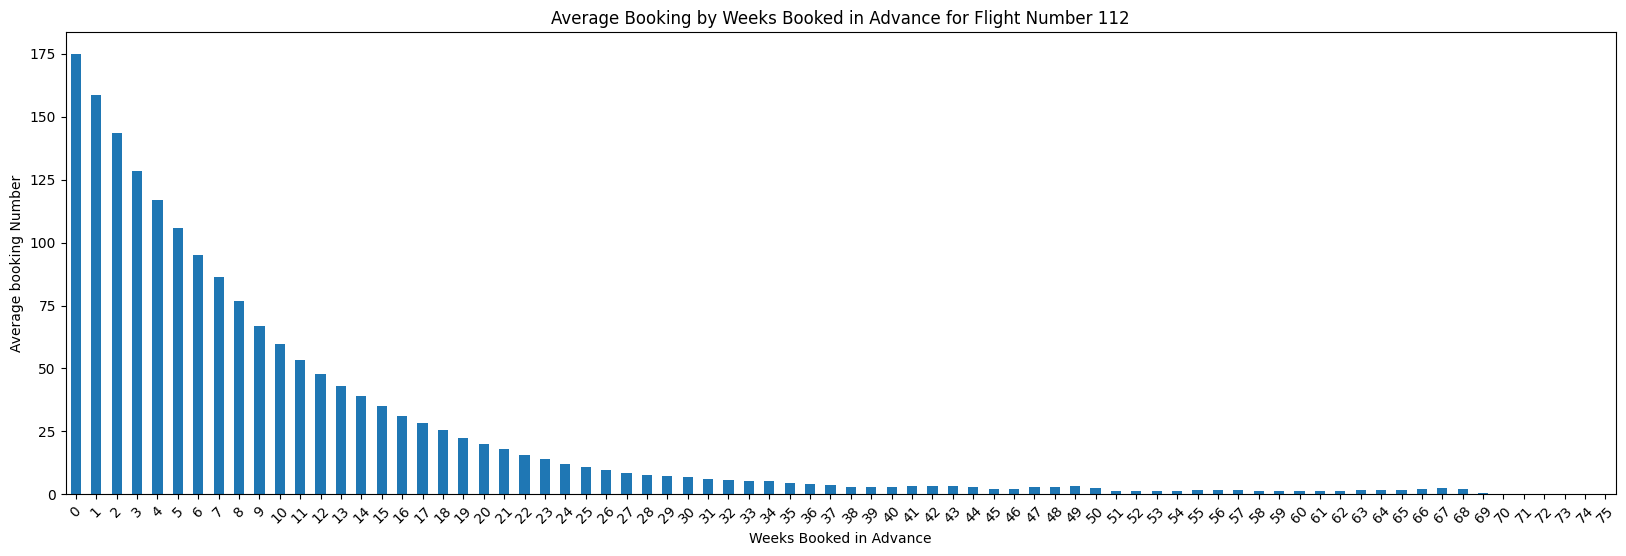

In [22]:
transat_data = pd.read_csv("transat.csv")
flight_numbers = transat_data['FlightNumber'].unique()
for flight_number in flight_numbers:
    flight_data = transat_data[transat_data['FlightNumber'] == flight_number]
    average_revenue = flight_data.groupby('NDOWeek')['Booked_Economy'].mean()
    plt.figure(figsize=(20, 6))
    average_revenue.plot(kind='bar')
    plt.xlabel('Weeks Booked in Advance')
    plt.ylabel('Average booking Number')
    plt.title(f'Average Booking by Weeks Booked in Advance for Flight Number {flight_number}')
    plt.xticks(rotation=45)
    plt.show()

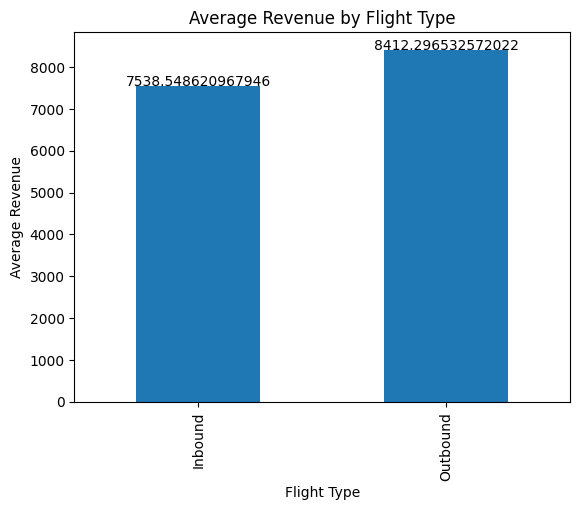

0.10386556253942839


In [4]:
average_revenue = transat_data.groupby('Traffic')['Revenue_Economy'].mean()
average_revenue.plot(kind='bar')
plt.xlabel('Flight Type'); plt.ylabel('Average Revenue'); plt.title('Average Revenue by Flight Type')
for i in range(len(average_revenue)):
    plt.text(x=i, y=average_revenue[i], s=average_revenue[i], ha='center')
plt.show()
inbound = average_revenue['Inbound'] ; outbound = average_revenue['Outbound']
difference = (outbound - inbound) / outbound ; print(difference)

<h3> Interpretation above graph </h3>

<ul>
<li> Outbound flights tend to generate more revenue than inbound flights (average of 8412$ versus 7537$)</li>
<li> 10.3% difference between inbound and outbound</li>
<li> limitations: this does not include costs, only revenue hence net income analysis cannot be performed to understand which route can maximize profits</li>
</ul>

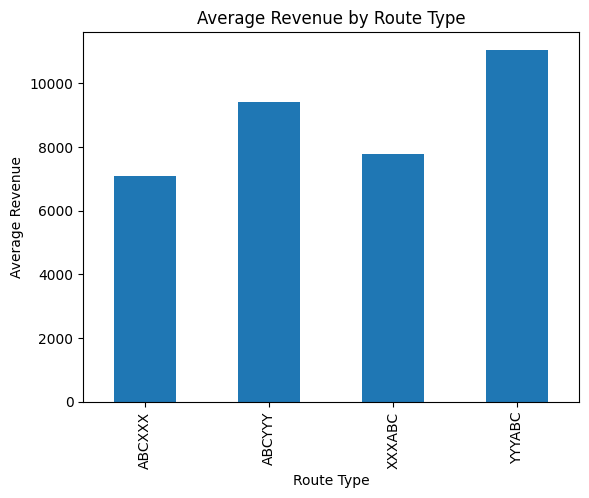

In [7]:
average_revenue = transat_data.groupby('Route')['Revenue_Economy'].mean()
average_revenue.plot(kind='bar')
plt.xlabel('Route Type')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Route Type')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> YYYABC route generates the highest revenue  </li>
<li> ABCYYY route generates the second highest revenue </li>
</ul>

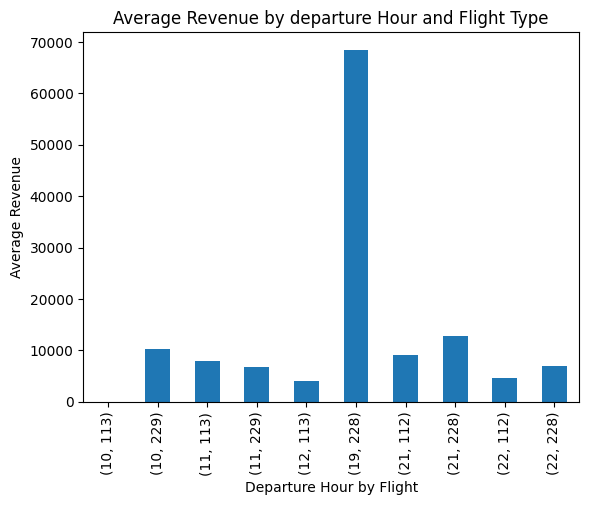

In [10]:
average_revenue = transat_data.groupby(['Hour', 'FlightNumber'])['Revenue_Economy'].mean()
average_revenue.plot(kind='bar')
plt.xlabel('Departure Hour by Flight')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by departure Hour and Flight Type')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> Strong revenue irregularities on flights that depart at 7pm (19:00)  for flights 228 </li>
<li> possible explanation: this might be a short distance flights, reserved for business flights (people tend to travel for business after working hour of 9-5) </li>
<li> same flight (228) generates a much lower revenue when it takes off at 9 pm (21)
</ul>

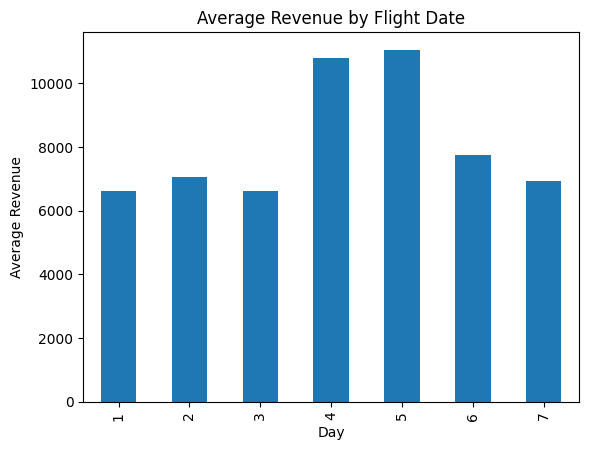

In [14]:
average_revenue = transat_data.groupby('DayOfWeek')['Revenue_Economy'].mean()
average_revenue.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Flight Date')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> flights that take off on thursday and friday (day 4 and 5)  generates the highest revenue</li>
<li> sunday and monday generating the lowest revenue </li>

</ul>

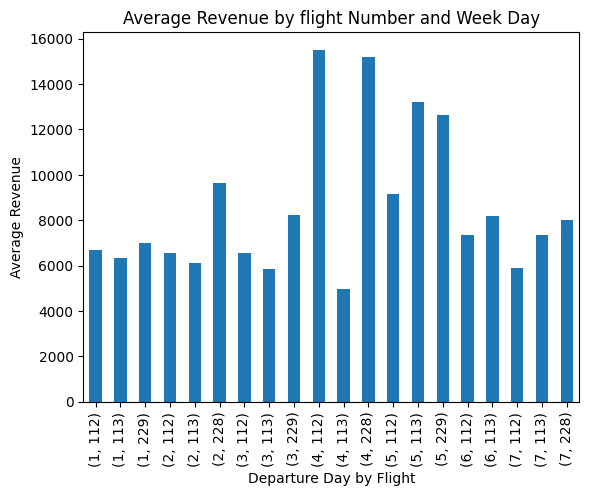

In [13]:
average_revenue = transat_data.groupby(['DayOfWeek', 'FlightNumber'])['Revenue_Economy'].mean()
average_revenue.plot(kind='bar')
plt.xlabel('Departure Day by Flight')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by flight Number and Week Day')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> flight 228 and 229 are shown to be the most revenue generating assets similar to previous graphs, along with flight 112 on thursday </li>
<li> even with a breakdown per flight, it appears thursday and friday are the highest revenue generating flights. </li>
<li> possible strategy of higher fare prices on thursday and friday, as willingness to pay is present.</li>
</ul>

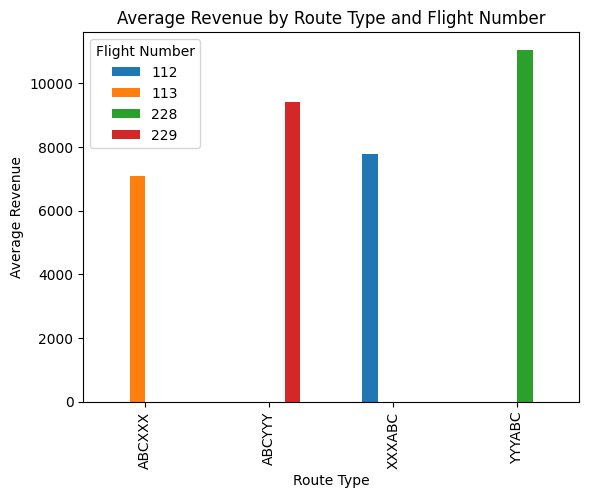

In [9]:
pivot_table = pd.pivot_table(transat_data, values='Revenue_Economy', index='Route', columns='FlightNumber', aggfunc='mean')
pivot_table.plot(kind='bar')

plt.xlabel('Route Type')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Route Type and Flight Number')
plt.legend(title='Flight Number')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> each flight has its own designated route  </li>
<li> comparing different flights on the same route to see which one generates more revenue will not be possible  </li>
<li> we again see flight 228 and 229. either those flights carry more people, or cater to people with higher disposable income going to expensive locations</li>
</ul>

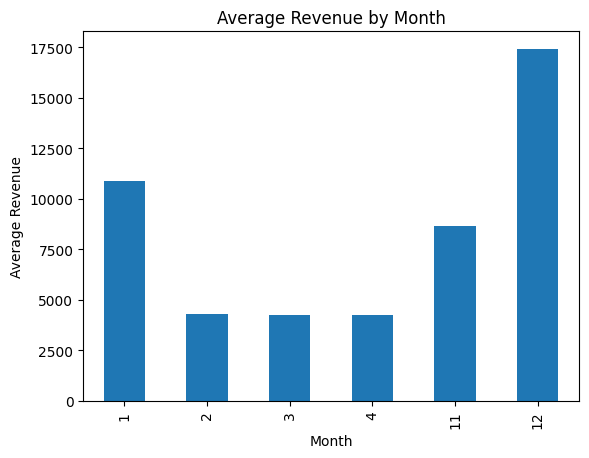

In [10]:
data = pd.read_csv('transat.csv', parse_dates=['DepartureDate'])

data['month'] = data['DepartureDate'].dt.month
average_revenue = data.groupby('month')['Revenue_Economy'].mean()
average_revenue.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Month')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> SEASONALITY is present on the graph above, with 12 (december) and (1) january </li>
<li> people tend to travel during christmas time and come back during january = one possible explanation on revenue increase in dec and jan </li>

</ul>

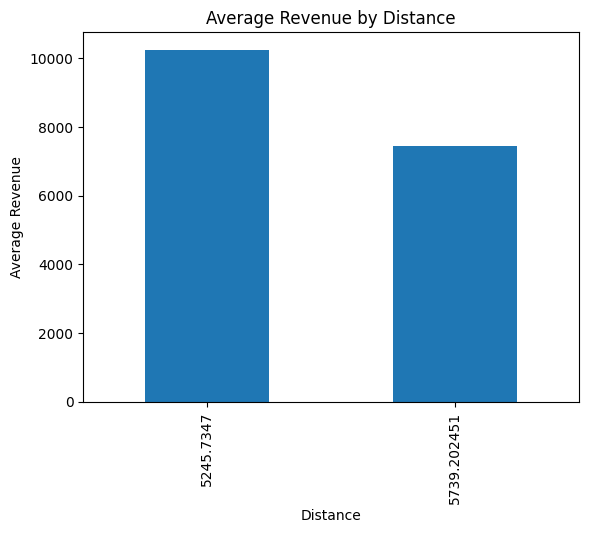

In [11]:
average_revenue = data.groupby('Distance')['Revenue_Economy'].mean()

average_revenue.plot(kind='bar')
plt.xlabel('Distance')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Distance')
plt.show()

<h3> Interpretation above graph </h3>

<ul>
<li> short distance flight generate more revenue than long distance flight which is quite suprising </li>
<li> destination can also play a big role (snow birds flying to florida, versus someone going to the middle east) </li>
</ul>

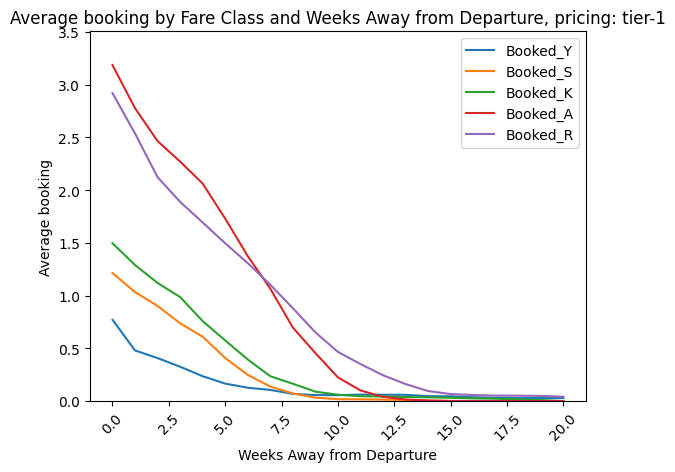

In [4]:
transat_data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'Booked_Y', 'Booked_S', 'Booked_K', 'Booked_A', 'Booked_R']
data = transat_data[columns_to_keep]

filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]

average_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = average_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average booking')
plt.title('Average booking by Fare Class and Weeks Away from Departure, pricing: tier-1')
plt.xticks(rotation=45)

ax.set_ylim([0, average_revenue_by_fare_class.values.max() * 1.1])
plt.show()

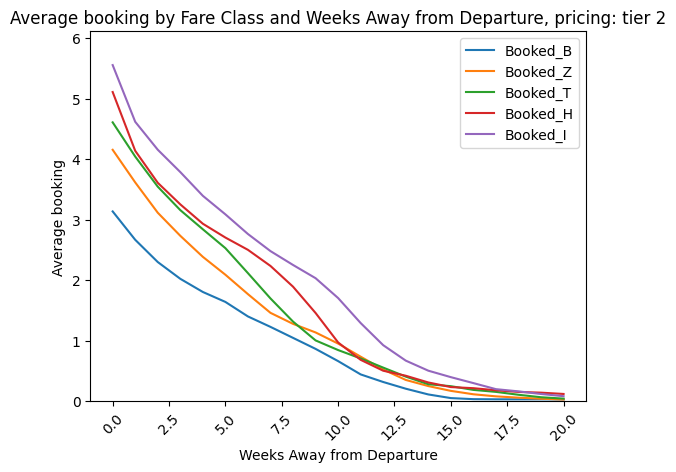

In [5]:
transat_data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'Booked_B', 'Booked_Z', 'Booked_T', 'Booked_H', 'Booked_I']
data = transat_data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]
average_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = average_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average booking')
plt.title('Average booking by Fare Class and Weeks Away from Departure, pricing: tier 2')
plt.xticks(rotation=45)
ax.set_ylim([0, average_revenue_by_fare_class.values.max() * 1.1])

plt.show()

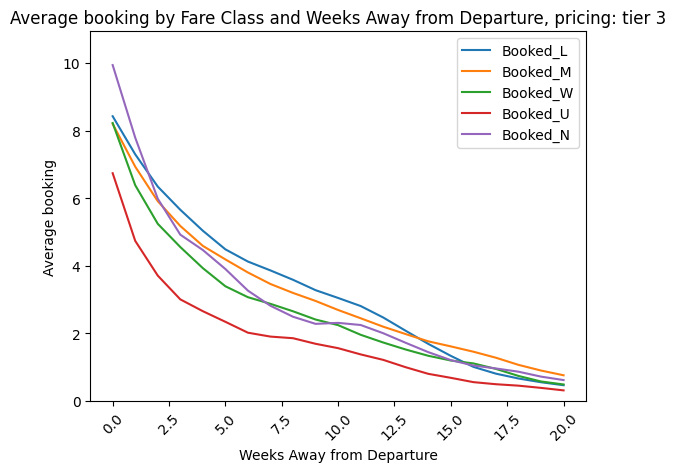

In [6]:
transat_data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'Booked_L', 'Booked_M', 'Booked_W', 'Booked_U', 'Booked_N']
data = transat_data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]
average_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = average_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average booking')
plt.title('Average booking by Fare Class and Weeks Away from Departure, pricing: tier 3')
plt.xticks(rotation=45)
ax.set_ylim([0, average_revenue_by_fare_class.values.max() * 1.1])

plt.show()

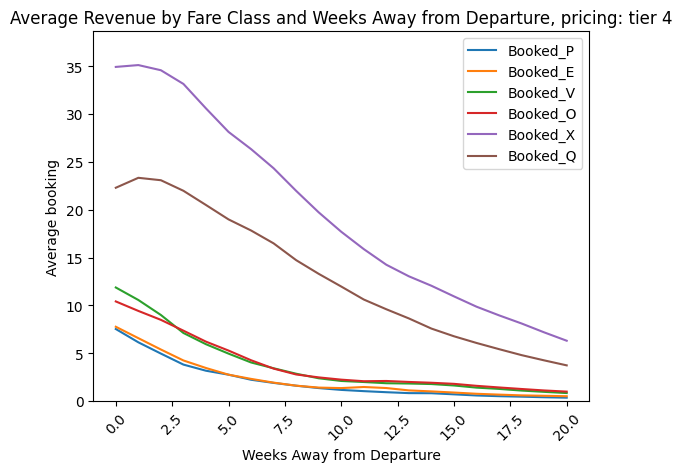

In [19]:
transat_data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'Booked_P', 'Booked_E', 'Booked_V', 'Booked_O', 'Booked_X', 'Booked_Q']
data = transat_data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]
average_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = average_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average booking')
plt.title('Average Revenue by Fare Class and Weeks Away from Departure, pricing: tier 4')
plt.xticks(rotation=45)
ax.set_ylim([0, average_revenue_by_fare_class.values.max() * 1.1])

plt.show()

<h3> Interpretation for the 4 graphs above</h3>

<ul>
<li> cheaper fare classes (tier 4) tend to see demand sooner than expensive fares (tier 1) </li>
<li> tier 4 fare booking start around week 15-20 where tier 1 flights around week 8 </li>
<li> possible weakness: making cheap flights are expensive flights availalbe at the same time via different sales channels might not be a shrewd decision</li>
</ul>

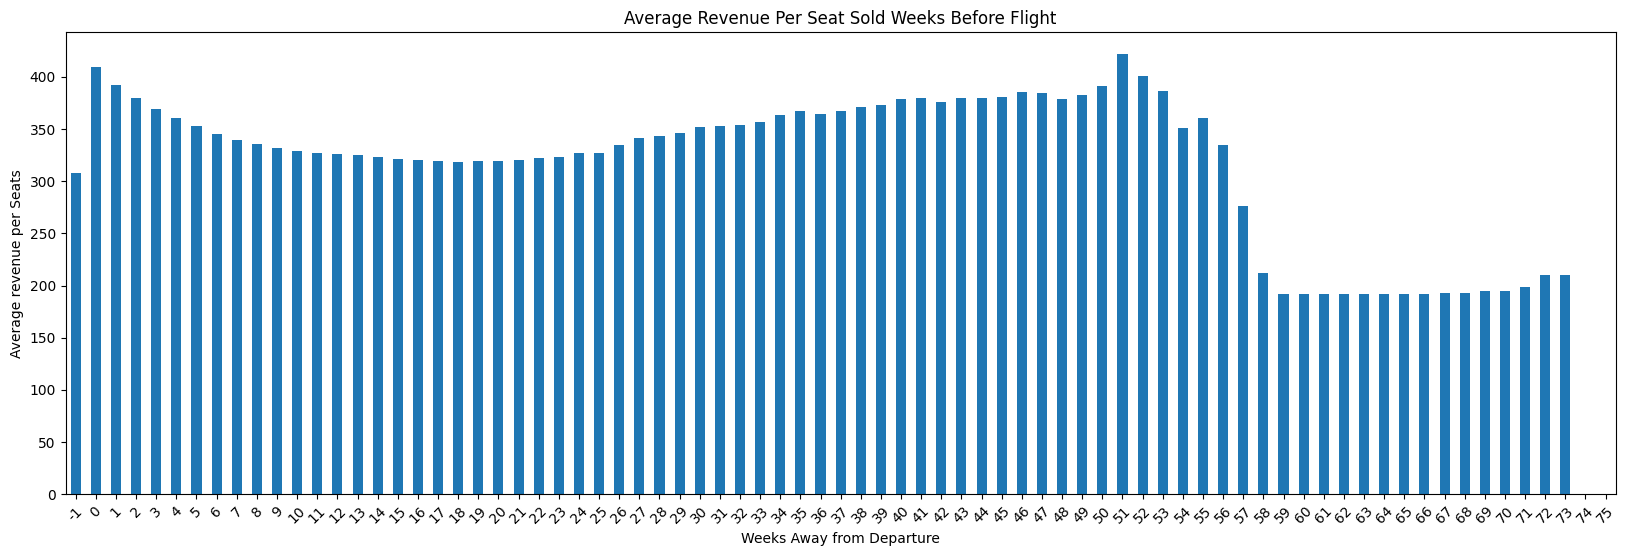

In [21]:
data = pd.read_csv("transat.csv")
filtered_data = data
avg_avail = filtered_data.groupby('NDOWeek')['TMC'].mean()

plt.figure(figsize=(20, 6))
avg_avail.plot(kind='bar')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average revenue per Seat Sold')
plt.title('Average Revenue Per Seat Sold Weeks Before Flight')
plt.xticks(rotation=45)
plt.show()

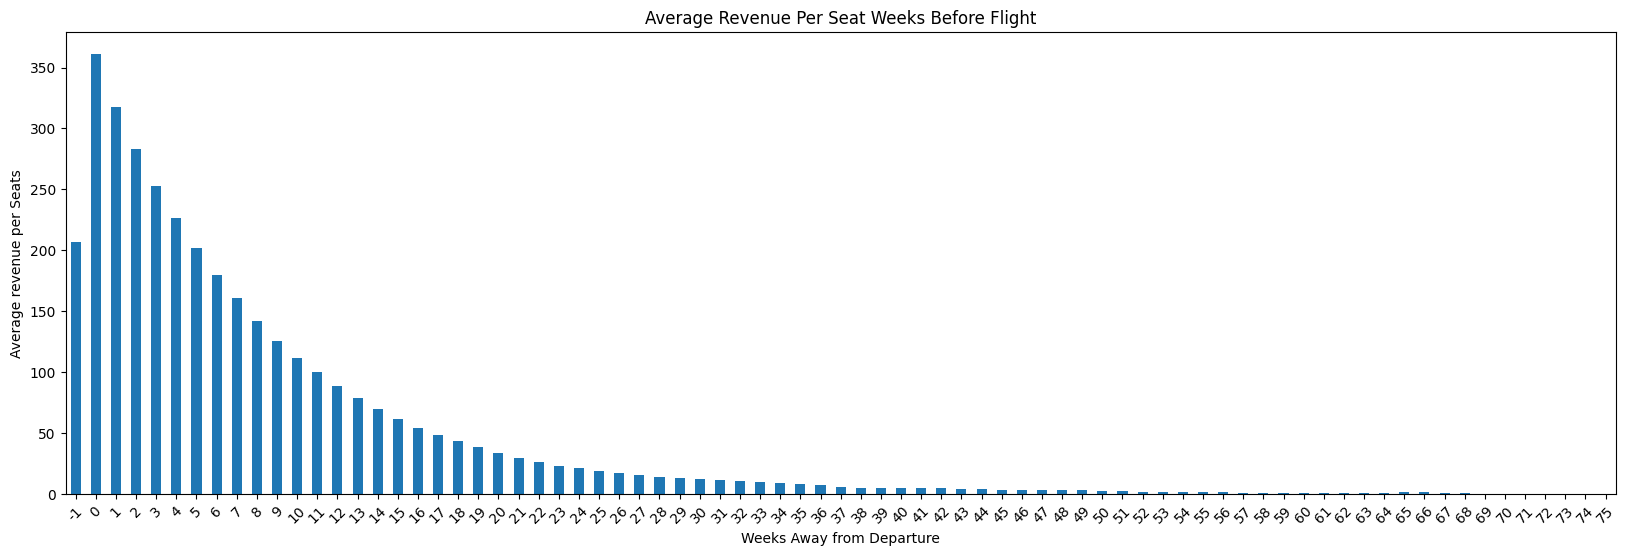

In [22]:
data = pd.read_csv("transat.csv")
filtered_data = data
avg_avail = filtered_data.groupby('NDOWeek')['TMS'].mean()

plt.figure(figsize=(20, 6))
avg_avail.plot(kind='bar')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average revenue per Seats')
plt.title('Average Revenue Per Seat Weeks Before Flight')
plt.xticks(rotation=45)
plt.show()

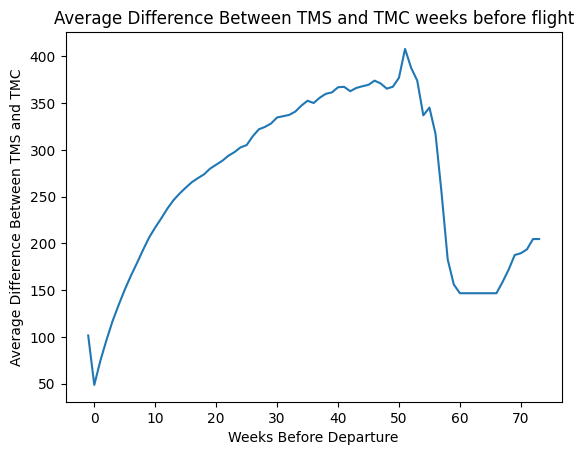

In [23]:
df = pd.read_csv('transat.csv')

#average rev per seat sold (minus) average rev per seat expected
df['difference'] = df['TMC'] - df['TMS']
avg_difference = df.groupby('NDOWeek')['difference'].mean()
plt.plot(avg_difference)
plt.title('Average Difference Between TMS and TMC weeks before flight')
plt.xlabel('Weeks Before Departure')
plt.ylabel('Average Difference Between TMS and TMC')
plt.show()

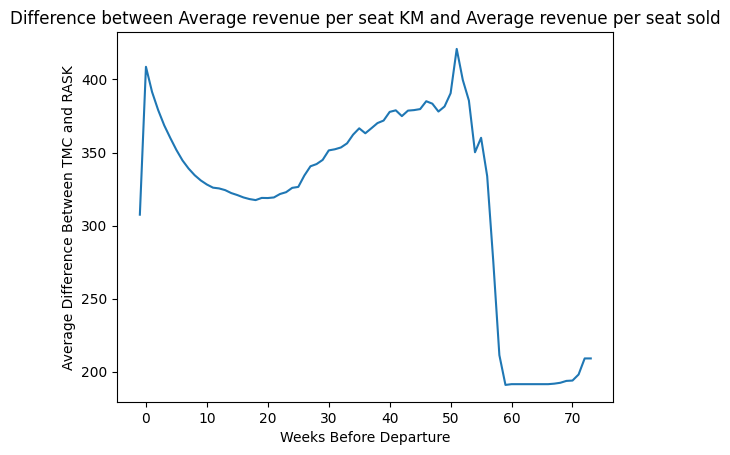

In [15]:
df = pd.read_csv('transat.csv')


df['difference'] = df['TMC'] - df['RASK'].mean()
avg_difference = df.groupby('NDOWeek')['difference'].mean()

plt.plot(avg_difference)
plt.title('Difference between Average revenue per seat KM and Average revenue per seat sold')
plt.xlabel('Weeks Before Departure')
plt.ylabel('Average Difference Between TMC and RASK')
plt.show()

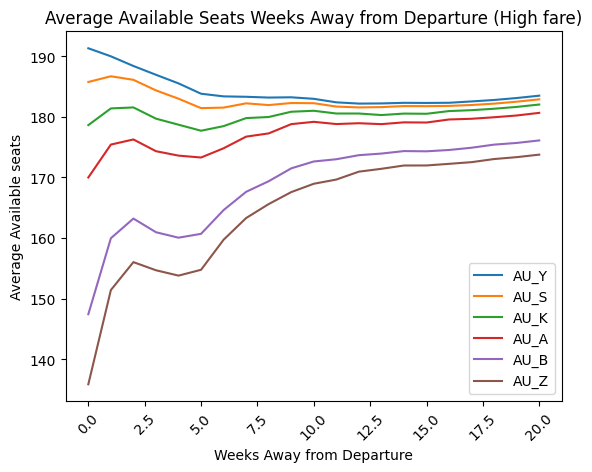

In [39]:
data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'AU_Y', 'AU_S', 'AU_K', 'AU_A', 'AU_B', 'AU_Z']
data = data[columns_to_keep]

filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]

avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
plot_data = avg_revenue_by_fare_class[columns_to_keep[1:]]

ax = plot_data.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average Available seats')
plt.title('Average Available Seats Weeks Away from Departure (High fare)')
plt.xticks(rotation=45)

plt.show()

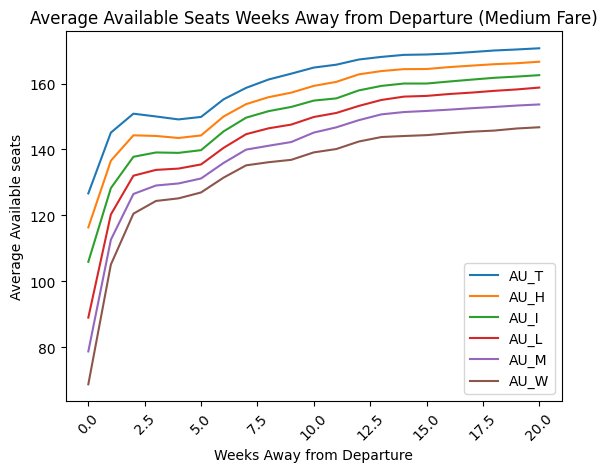

In [38]:
data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'AU_T', 'AU_H', 'AU_I', 'AU_L', 'AU_M', 'AU_W']
data = data[columns_to_keep]

filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]

avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
plot_data = avg_revenue_by_fare_class[columns_to_keep[1:]]

ax = plot_data.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average Available seats')
plt.title('Average Available Seats Weeks Away from Departure (Medium Fare)')
plt.xticks(rotation=45)

plt.show()

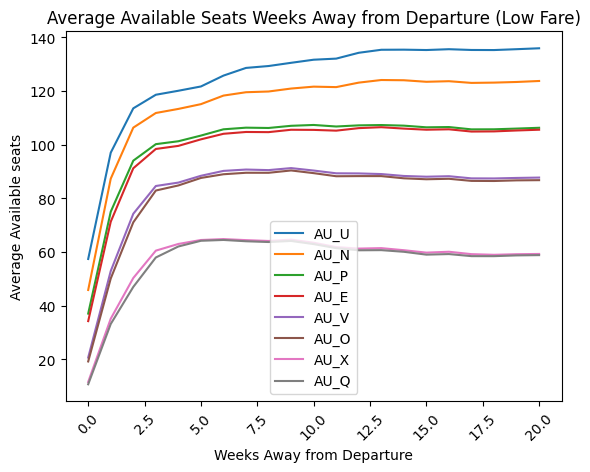

In [37]:
data = pd.read_csv("transat.csv")
columns_to_keep = ['NDOWeek', 'AU_U', 'AU_N', 'AU_P', 'AU_E', 'AU_V', 'AU_O', 'AU_X', 'AU_Q'  ]
data = data[columns_to_keep]

filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 20)]

avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()


plot_data = avg_revenue_by_fare_class[columns_to_keep[1:]]

ax = plot_data.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Average Available seats')
plt.title('Average Available Seats Weeks Away from Departure (Low Fare)')
plt.xticks(rotation=45)

plt.show()

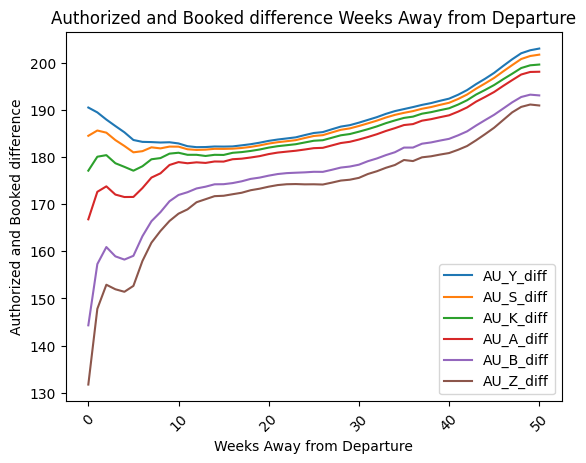

In [7]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("transat.csv")
au_columns = ['NDOWeek', 'AU_Y', 'AU_S', 'AU_K', 'AU_A', 'AU_B', 'AU_Z']
booked_columns = ['Booked_Y', 'Booked_S', 'Booked_K', 'Booked_A', 'Booked_B', 'Booked_Z']

for au, book in zip(au_columns[1:], booked_columns):
    data[f'{au}_diff'] = data[au] - data[book]

columns_to_keep = ['NDOWeek'] + [f'{au}_diff' for au in au_columns[1:]]
data = data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 50)]
avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = avg_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Authorized and Booked difference')
plt.title('Authorized and Booked difference Weeks Away from Departure')
plt.xticks(rotation=45)
plt.show()

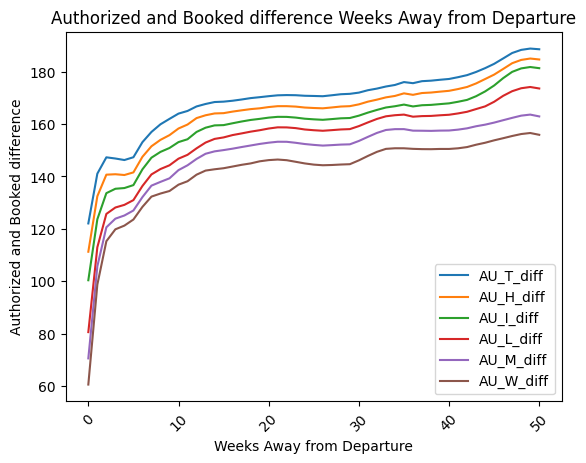

In [2]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("transat.csv")
au_columns = ['NDOWeek', 'AU_T', 'AU_H', 'AU_I', 'AU_L', 'AU_M', 'AU_W']
booked_columns = ['Booked_T', 'Booked_H', 'Booked_I', 'Booked_L', 'Booked_M', 'Booked_W']

for au, avail in zip(au_columns[1:], booked_columns):
    data[f'{au}_diff'] = data[au] - data[avail]

columns_to_keep = ['NDOWeek'] + [f'{au}_diff' for au in au_columns[1:]]
data = data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 50)]
avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = avg_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Authorized and Booked difference')
plt.title('Authorized and Booked difference Weeks Away from Departure')
plt.xticks(rotation=45)
plt.show()

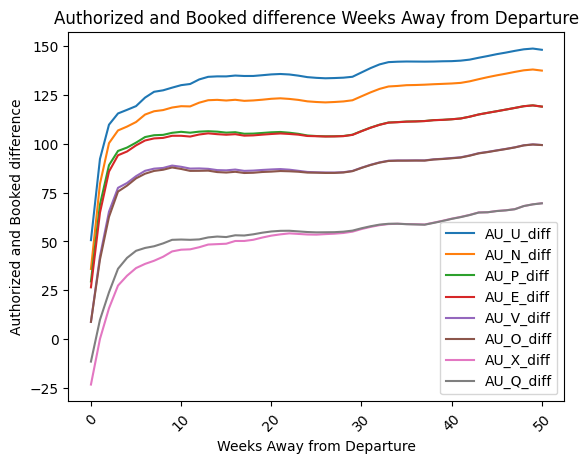

In [1]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("transat.csv")
auth_columns = ['NDOWeek', 'AU_U', 'AU_N', 'AU_P', 'AU_E', 'AU_V', 'AU_O', 'AU_X', 'AU_Q' ]
booked_columns = ['Booked_U', 'Booked_N', 'Booked_P', 'Booked_E', 'Booked_V', 'Booked_O','Booked_X', 'Booked_Q' ]

for avail, booked in zip(auth_columns[1:], booked_columns):
    data[f'{avail}_diff'] = data[avail] - data[booked]

columns_to_keep = ['NDOWeek'] + [f'{au}_diff' for au in auth_columns[1:]]
data = data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 50)]
avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = avg_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Authorized and Booked difference')
plt.title('Authorized and Booked difference Weeks Away from Departure')
plt.xticks(rotation=45)
plt.show()

<h3> Interpretation for the 4 graphs above</h3>

<ul>
<li> low fare classes tend to fall below 0 on week of take off == OVERBOOKING (demand > supply)</li>
<li>higher fare classes do not reeach 0 on the day the flight takes off == SURPLUS (supply > demand)</li>
<li> to reinforce my previous point: making cheap fares and expensive fares available during the same time might not be beneficial: why would i buy the same product for more $? </li>
</ul>

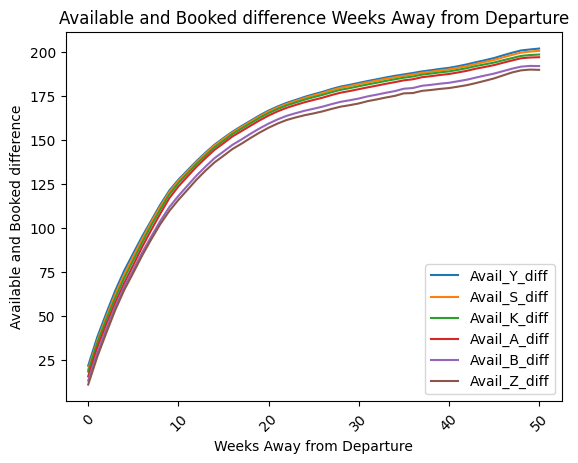

In [13]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("transat.csv")
au_columns = ['NDOWeek', 'Avail_Y', 'Avail_S', 'Avail_K', 'Avail_A', 'Avail_B', 'Avail_Z']; 
booked_columns = ['Booked_Y', 'Booked_S', 'Booked_K', 'Booked_A', 'Booked_B', 'Booked_Z']

for au, book in zip(au_columns[1:], booked_columns):
    data[f'{au}_diff'] = data[au] - data[book]

columns_to_keep = ['NDOWeek'] + [f'{au}_diff' for au in au_columns[1:]]
data = data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 50)]
avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = avg_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure'); plt.ylabel('Available and Booked difference')
plt.title('Available and Booked difference Weeks Away from Departure')
plt.xticks(rotation=45)
plt.show()

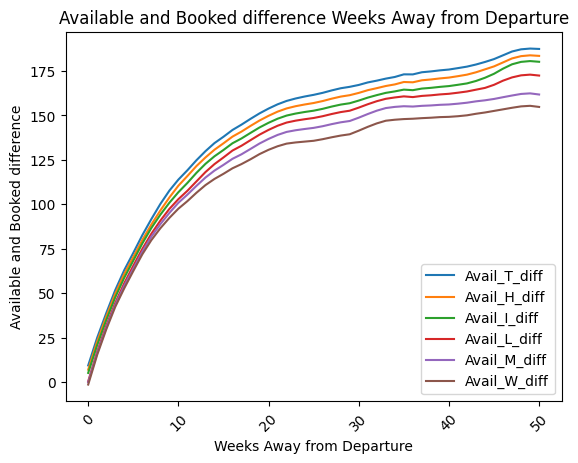

In [14]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("transat.csv")
avail_columns = ['NDOWeek', 'Avail_T', 'Avail_H', 'Avail_I', 'Avail_L', 'Avail_M', 'Avail_W']
booked_columns = ['Booked_T', 'Booked_H', 'Booked_I', 'Booked_L', 'Booked_M', 'Booked_W']

for au, avail in zip(avail_columns[1:], booked_columns):
    data[f'{au}_diff'] = data[au] - data[avail]

columns_to_keep = ['NDOWeek'] + [f'{au}_diff' for au in avail_columns[1:]]
data = data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 50)]
avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = avg_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Available and Booked difference')
plt.title('Available and Booked difference Weeks Away from Departure')
plt.xticks(rotation=45); plt.show()

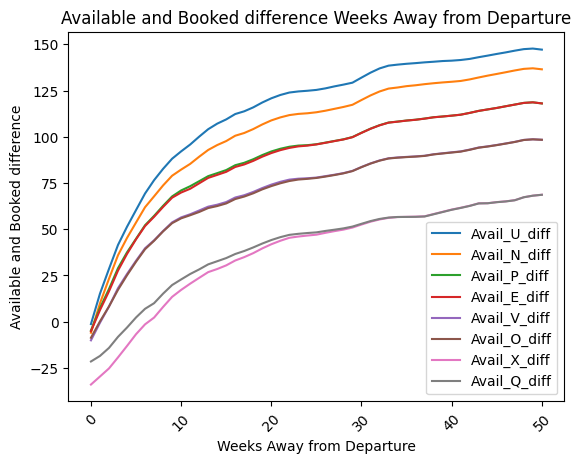

In [15]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("transat.csv")
avail_columns = ['NDOWeek', 'Avail_U', 'Avail_N', 'Avail_P', 'Avail_E', 'Avail_V', 'Avail_O', 'Avail_X', 'Avail_Q' ]
booked_columns = ['Booked_U', 'Booked_N', 'Booked_P', 'Booked_E', 'Booked_V', 'Booked_O','Booked_X', 'Booked_Q' ]

for avail, booked in zip(avail_columns[1:], booked_columns):
    data[f'{avail}_diff'] = data[avail] - data[booked]

columns_to_keep = ['NDOWeek'] + [f'{au}_diff' for au in avail_columns[1:]]
data = data[columns_to_keep]
filtered_data = data[(data['NDOWeek'] >= 0) & (data['NDOWeek'] <= 50)]
avg_revenue_by_fare_class = filtered_data.groupby('NDOWeek').mean()
ax = avg_revenue_by_fare_class.plot(kind='line')
plt.xlabel('Weeks Away from Departure')
plt.ylabel('Available and Booked difference')
plt.title('Available and Booked difference Weeks Away from Departure')
plt.xticks(rotation=45)
plt.show()

<h3> Interpretation for the 4 graphs above</h3>

<ul>
<li> this graph takes the difference between fares offered and fares booked
<li> Same issue of overbooking for  cheap fares avail_x and avail_Q </li>
<li> an efficient sales strategy should see all the lines touch 0 when NDO=0 (when the airline takes off) that would entain an equilibrium reached (Supply=Ddemand) </li>
<li> cheaper flights are falling below 0  (demand > supply) </li>
</ul>